This porgam will utilized Monte Carlo Simulation for Optimization Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fb = pd.read_csv('FB.csv',index_col = 'Date')
amzn = pd.read_csv('AMZN.csv',index_col = 'Date')
aapl = pd.read_csv('AAPL (1).csv',index_col = 'Date')
nflx = pd.read_csv('NFLX.csv',index_col = 'Date')
goog = pd.read_csv('GOOG.csv',index_col = 'Date')


In [3]:
stocks = pd.concat([fb['Close'],amzn['Close'],aapl['Close']
                         ,nflx['Close'],goog['Close']],axis=1)
stocks.columns = ['FB','AMZN','AAPL','NFLX','GOOG']

In [4]:
stocks.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2014-01-02,54.709999,397.970001,79.018570,51.831429,554.481689
2014-01-03,54.560001,396.440002,77.282860,51.871429,550.436829
2014-01-06,57.200001,393.630005,77.704285,51.367142,556.573853
2014-01-07,57.919998,398.029999,77.148575,48.500000,567.303589
2014-01-08,58.230000,401.920013,77.637146,48.712856,568.484192


## Simulating Over Thousands of Possible Allocations

In [5]:
#using log return will give us the change in return; easier than arithmetic returns
log_ret = np.log(stocks/stocks.shift(1))

ports = 50000

#zeros out the variables required for Sharpe eq.
all_weights = np.zeros((ports,len(stocks.columns)))
ret_arr = np.zeros(ports)
vol_arr = np.zeros(ports)
sr_arr = np.zeros(ports)

for ind in range(ports):
    #Creating random allocation
    weights = np.array(np.random.random(5))

    #Normalizing the weights
    weights = weights/ np.sum(weights)
    #Saving the weights into all_weights
    all_weights[ind,:] = weights
    
    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sr_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    
    
    
 

In [6]:
sr_arr.max()

0.973333590226001

In [7]:
result = sr_arr.argmax()
sr_arr.argmax()
#sr_arr.argmax() returns the data with the highest sharpe ratio 

8584

In [8]:
all_weights[result,:]

array([0.0481552 , 0.49862654, 0.17272326, 0.27136262, 0.00913238])

This is the optimal allocation for the FAANG stocks that gives the maximum return

In [9]:
max_sr_ret = ret_arr[result]
max_sr_vol = vol_arr[result]

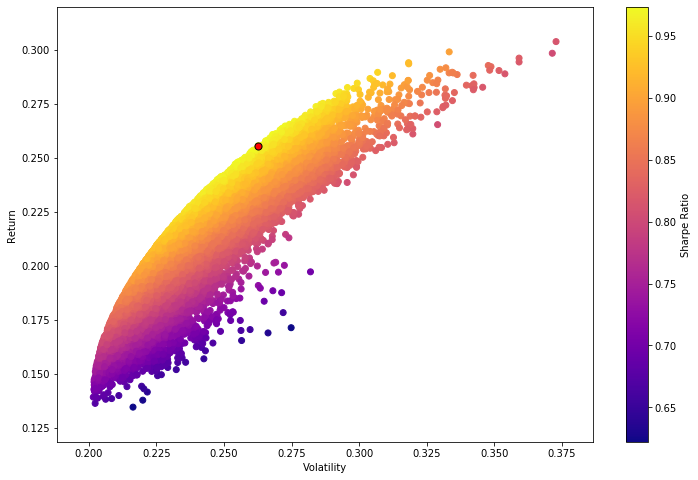

In [10]:
#Plotting the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

The  outline of "bullet" shape denotes the efficent frontier and the red dot underscores the optimal sharpe ratio which gives us the highest return given lowest volatility.

In [29]:
fb_result= all_weights[result,:][0]
amzn_result= all_weights[result,:][1]
aapl_result= all_weights[result,:][2]
nflx_result= all_weights[result,:][3]
goog_result= all_weights[result,:][4]

str_result = f' Allocation weights for FAANG is \n FB: {fb_result}, \n AMZN: {amzn_result}, \n AAPL: {aapl_result}, \n NFLX: {nflx_result}, \n GOOG: {goog_result}'
print(str_result)            
                


 Allocation weights for FAANG is 
 FB: 0.04815519856838214, 
 AMZN: 0.4986265406453615, 
 AAPL: 0.17272326146341352, 
 NFLX: 0.2713626168138722, 
 GOOG: 0.009132382508970593


In [12]:
for stock_df,allo in zip([fb,amzn,aapl,nflx,goog],[fb_result,amzn_result
                                                   ,aapl_result,nflx_result,
                                                  goog_result]):
        stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']
        stock_df['Allocation'] = stock_df['Normed Return']*allo
        stock_df['Position Values'] = stock_df['Allocation']*1000000
        #Using 1,000,000 as the purchasing power

In [13]:
portfolio_val = pd.concat([fb['Position Values'],amzn['Position Values'],
                          aapl['Position Values'],nflx['Position Values'],
                          goog['Position Values']],axis=1)
portfolio_val.columns = ['FB Pos','AMZN Pos','AAPL Pos','NFLX Pos','GOOG Pos']

In [14]:
portfolio_val.head()

,FB Pos,AMZN Pos,AAPL Pos,NFLX Pos,GOOG Pos
Date,,,,,
2014-01-02,48155.198568,498626.540645,172723.261463,271362.616814,9132.382509
2014-01-03,48023.171816,496709.566736,168929.263557,271572.036174,9065.763161
2014-01-06,50346.873636,493188.851406,169850.442286,268931.849658,9166.840711
2014-01-07,50980.607855,498701.713636,168635.743366,253920.973614,9343.560800
2014-01-08,51253.468541,503575.609204,169703.754844,255035.377794,9363.005478


Text(0.5, 1.0, 'Total Portfolio Value')

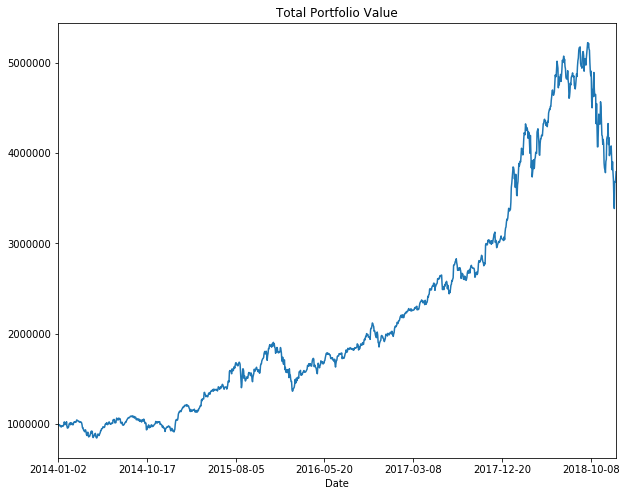

In [15]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

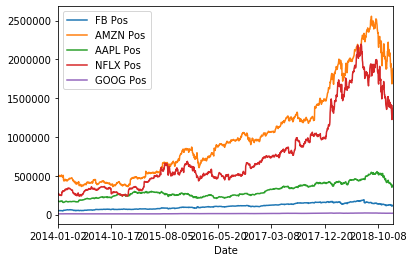

In [16]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [17]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [18]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 279.3113385370714 was percent!
